### I. Import Required Dependecies

In [21]:
import os
import glob
import cv2                      # OpenCV
from PIL import Image           # Pillow
import numpy as np              # NumPy
import pandas as pd             # Pandas
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn
import tensorflow as tf         # TensorFlow

# Keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3 # Import Google's InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report



### II. Read Dataset

**Directory Names Containing Training Data**

In [22]:
# Define the path to the directory containing the images for training
train_data = '/kaggle/input/flower-classification/train'

# Create a Pandas DataFrame with a single column
# The column is populated with the list of file/directory names in the 'train_data' directory
pd.DataFrame(
    os.listdir(train_data),
    columns=['File Name']
)

,File Name
0,astilbe
1,black_eyed_susan
2,bellflower
3,classname.txt
4,common_daisy
5,coreopsis
6,dandelion
7,water_lily
8,carnation
9,calendula


**Directory Names Containing Validation Data**

In [23]:
# Define the path to the directory containing the images for validation
val_data ='/kaggle/input/flower-classification/val'

# Create a Pandas DataFrame with a single column
# The column is populated with the list of file/directory names in the 'validation_data' directory
pd.DataFrame(os.listdir(val_data),columns=['File Name'])

,File Name
0,astilbe
1,black_eyed_susan
2,bellflower
3,classname.txt
4,common_daisy
5,coreopsis
6,dandelion
7,water_lily
8,carnation
9,calendula


**Directory Paths Containing Training Data**

In [24]:
# Get a list of the file paths in the 'train_data' directory
train_files = [i for i in glob.glob(train_data + "/*/*")]

# Randomly shuffle the list of file paths
np.random.shuffle(train_files)

# Extract labels from the directory names of each file path
labels = [os.path.dirname(i).split("/")[-1] for i in train_files]

# Combine file paths & its corresponding labels into a list of tuples
data = zip(train_files, labels)

# Create a Pandas DataFrame with 2 columns
# "Path" column contains file paths, & "Label" column contains corresponding labels
training_data = pd.DataFrame(data, columns=["Path", "Label"])

# Display the contents of the DataFrame
training_data

,Path,Label
0,/kaggle/input/flower-classification/train/dand...,dandelion
1,/kaggle/input/flower-classification/train/cale...,calendula
2,/kaggle/input/flower-classification/train/cale...,calendula
3,/kaggle/input/flower-classification/train/blac...,black_eyed_susan
4,/kaggle/input/flower-classification/train/dand...,dandelion
...,...,...
13637,/kaggle/input/flower-classification/train/bell...,bellflower
13638,/kaggle/input/flower-classification/train/asti...,astilbe
13639,/kaggle/input/flower-classification/train/bell...,bellflower
13640,/kaggle/input/flower-classification/train/asti...,astilbe


**Directory Paths Containing Validation Data**

In [25]:
# Get a list of the file paths in the 'validation_data' directory
val_files = [i for i in glob.glob(val_data + "/*/*")]

# Randomly shuffle the list of file paths
np.random.shuffle(val_files)

# Extract labels from the directory names of each file path
labels = [os.path.dirname(i).split("/")[-1] for i in val_files]

# Combine file paths & its corresponding labels into a list of tuples
data = zip(val_files, labels)

# Create a Pandas DataFrame with 2 columns
# "Path" column contains file paths, & "Label" column contains corresponding labels
validation_data = pd.DataFrame(data, columns = ["Path", "Label"])

# Display the contents of the DataFrame
validation_data

,Path,Label
0,/kaggle/input/flower-classification/val/califo...,california_poppy
1,/kaggle/input/flower-classification/val/calend...,calendula
2,/kaggle/input/flower-classification/val/iris/2...,iris
3,/kaggle/input/flower-classification/val/carnat...,carnation
4,/kaggle/input/flower-classification/val/califo...,california_poppy
...,...,...
93,/kaggle/input/flower-classification/val/iris/2...,iris
94,/kaggle/input/flower-classification/val/dandel...,dandelion
95,/kaggle/input/flower-classification/val/bellfl...,bellflower
96,/kaggle/input/flower-classification/val/dandel...,dandelion


### III. Data Visualization

**Training Data**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'dandelion'),
  Text(1, 0, 'calendula'),
  Text(2, 0, 'black_eyed_susan'),
  Text(3, 0, 'astilbe'),
  Text(4, 0, 'bellflower'),
  Text(5, 0, 'california_poppy'),
  Text(6, 0, 'common_daisy'),
  Text(7, 0, 'sunflower'),
  Text(8, 0, 'water_lily'),
  Text(9, 0, 'iris'),
  Text(10, 0, 'carnation'),
  Text(11, 0, 'rose'),
  Text(12, 0, 'coreopsis'),
  Text(13, 0, 'tulip')])

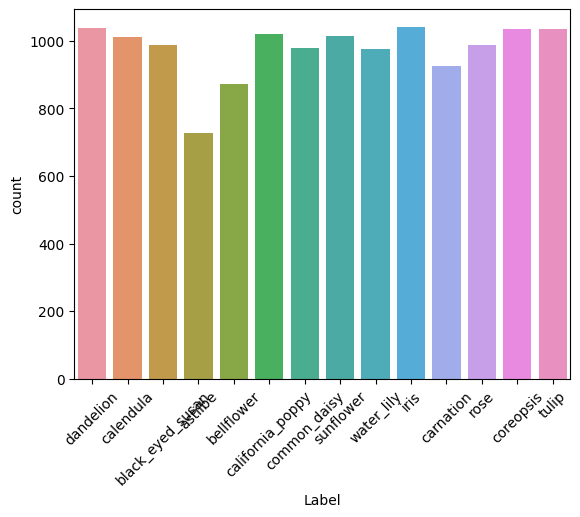

In [26]:
# Create a countplot() using Seaborn, where x-axis represents the "Label" column of the training_data DataFrame
sns.countplot(x = training_data["Label"])

# Rotate x-axis labels for better visibility
plt.xticks(rotation = 45)

**Validation Data**

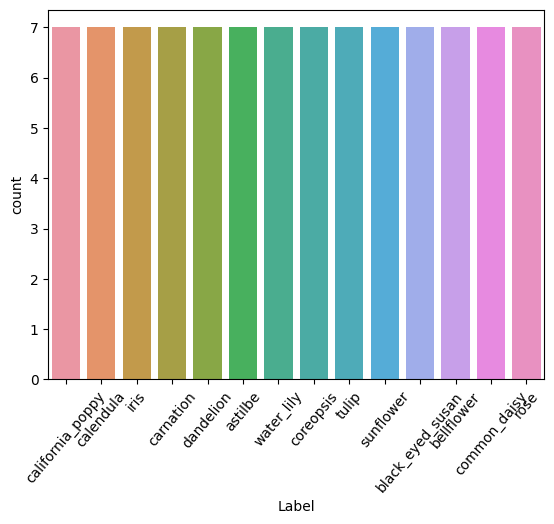

In [27]:
# Create a countplot() using Seaborn, where x-axis represents the "Label" column of the validation_data DataFrame
sns.countplot(x = validation_data["Label"])

# Rotate x-axis labels for better visibility
plt.xticks(rotation = 50);

### IV. Split Dataset

In [28]:
# Create an ImageDataGenerator for data augmentation
image_data_generator = ImageDataGenerator(
    rescale = 1.0 / 255,          # Rescale pixel values to the range [0, 1]
    rotation_range = 20,          # Randomly rotate images in the range of [-20, 20] degrees
    zoom_range = 0.2,             # Randomly zoom into images by up to 20%
    horizontal_flip = True,       # Randomly flip images horizontally
    validation_split = 0.2        # Reserve 20% of the data for validation
)

# Create a training data generator using the flow_from_dataframe method
train_generator = image_data_generator.flow_from_dataframe(
    dataframe = training_data,    # DataFrame containing file paths & labels for training data
    x_col = "Path",               # Column name containing file paths
    y_col = 'Label',              # Column name containing labels
    batch_size = 32,              # No. of samples per batch
    class_mode = "categorical",   # Class mode for one-hot encoded labels
    subset = "training",          # Use the training subset of the data
    target_size = (224, 224)      # Resize images to the specified target size: 224x224
)

# Create a validation data generator using the flow_from_dataframe method
val_generator = image_data_generator.flow_from_dataframe(
    dataframe = validation_data,  # DataFrame containing file paths & labels for validation data
    x_col = "Path",               # Column name containing file paths
    y_col = 'Label',              # Column name containing labels
    batch_size = 32,              # No. of samples per batch
    class_mode = "categorical",   # Class mode for one-hot encoded labels
    subset = "validation",        # Use the validation subset of the data
    target_size = (224, 224)      # Resize images to the specified target size: 224x224
)

Found 10914 validated image filenames belonging to 14 classes.
Found 19 validated image filenames belonging to 14 classes.


In [29]:
# Get the class indices (mapping of the class names to numerical indices) from the training generator
class_indices = train_generator.class_indices

# Display the keys (class names) from the class_indices dictionary
class_indices.keys()

dict_keys(['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily'])

In [30]:
# Initialize an empty list to store class labels
labels = []

# Iterate through the keys (class names) in the class_indices dictionary
for key in class_indices.keys():
    labels.append(key)  # Append each class name to the labels list

# Calculate the total no. of unique labels
total_labels = len(labels)

# Print the list of class labels and the total no. of unique labels
print("Labels: ", labels)
print("Total no. of unique labels:", total_labels)

Labels:  ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']
Total no. of unique labels: 14


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


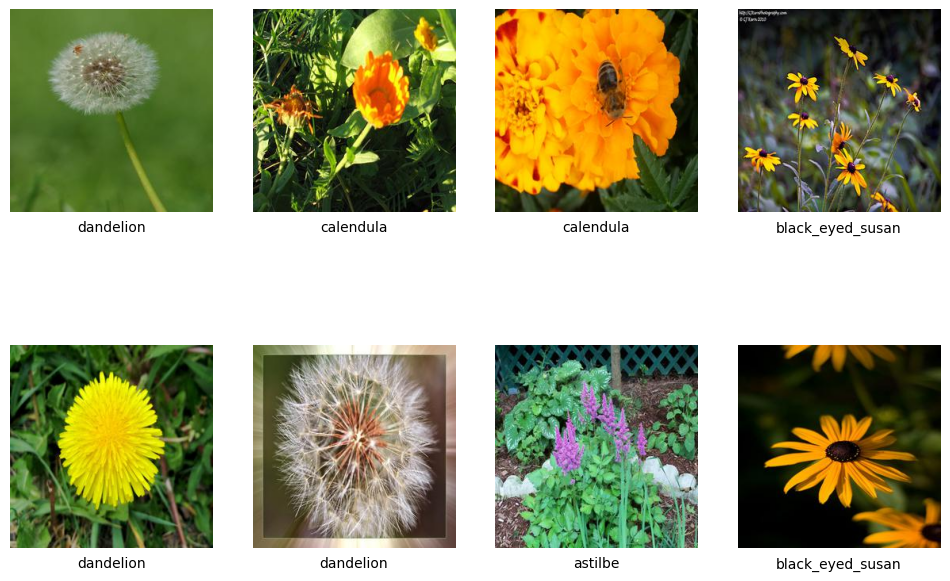

In [31]:
# Set the number of rows and columns for the subplot grid
no_of_rows = 2
no_of_columns = 4

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(12, 8))

# Iterate through the rows
for i in range(no_of_rows):
    # Iterate through the columns
    for j in range(no_of_columns):
        # Calculate the index for accessing the data
        index = i * no_of_columns + j

        # Check if the index is within the bounds of the data
        if index < len(training_data):

            # Open the image using the PIL library
            im = Image.open(training_data.iloc[index]['Path'])

            # Convert the PIL image to a NumPy array
            img = np.array(im)

            # Print the shape of the image array
            print(img.shape)

            # Display the image on the subplot at position (i, j)
            axes[i, j].imshow(img)

            # Turn off axis labels for better visualization
            axes[i, j].axis('off')

            # Get the label for the current image and display it as text
            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)

# Show the entire subplot grid
plt.show()

### V. Build Model

In [41]:
# Define the input shape for the model
input_shape = (224, 224, 3)

# Path to the manually downloaded InceptionV3 weights file
weights_path = '/kaggle/input/weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Check if the weights file exists locally, otherwise download manually
if not os.path.exists(weights_path):
    print(f"Downloading InceptionV3 weights manually to {weights_path}...")
    # You can download the weights from https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
    print("Please download the weights file manually and place it in the same directory as your script.")
    exit()

# Load the InceptionV3 model with the manually downloaded weights
base_model = InceptionV3(weights=weights_path, include_top=False, input_shape=input_shape)

# Set all layers of the base model to be trainable
for layer in base_model.layers:
    layer.trainable = True

# Create a sequential model
model = models.Sequential()

# Add the InceptionV3 base model to the sequential model
model.add(base_model)

# Add a global average pooling layer to reduce the spatial dimensions of the output
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 256 units and ReLU activation function
model.add(layers.Dense(256, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Add the final dense layer with the number of labels and softmax activation function
total_labels = 14
model.add(layers.Dense(total_labels, activation='softmax'))

# Display the summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 14)                3598      
                                                                 
Total params: 22330926 (85.19 MB)
Trainable params: 22296494 (85.05 MB)
Non-trainable params: 34432 (134.50 KB)
________

In [43]:
# Create a ModelCheckpoint callback to save the model's weights during training
# The 'save_best_only' option ensures that only the best model (based on validation performance) is saved
checkpoint = ModelCheckpoint("/kaggle/working/model.ckpt", save_best_only = True)

# Create an EarlyStopping callback to stop training if the validation performance doesn't improve for a specified number of epochs (patience)
# The 'restore_best_weights' option restores the best weights when training is stopped
early_stopping = EarlyStopping(patience = 5, restore_best_weights = True)

### VI. Compile Model

In [44]:
# Compile the model with the Adam optimizer, categorical crossentropy loss, & accuracy as the evaluation metric
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### VII. Train Model

In [45]:
# Train the model using the fit method
hist = model.fit(
    train_generator,                         # Training data generator
    steps_per_epoch = len(train_generator),  # No. of steps (batches) per training epoch
    epochs = 200,                            # No. of training epochs
    validation_data = val_generator,         # Validation data generator
    validation_steps = len(val_generator),   # No. of steps (batches) per validation epoch
    callbacks = [checkpoint, early_stopping] # Callbacks for model checkpointing and early stopping
)

Epoch 1/200
342/342 [==============================] - 2327s 7s/step - loss: 1.1038 - accuracy: 0.6782 - val_loss: 0.5493 - val_accuracy: 0.7895
Epoch 2/200
342/342 [==============================] - 2255s 7s/step - loss: 0.7092 - accuracy: 0.7989 - val_loss: 1.6052 - val_accuracy: 0.7895
Epoch 3/200
342/342 [==============================] - 2260s 7s/step - loss: 0.5638 - accuracy: 0.8390 - val_loss: 1.3672 - val_accuracy: 0.5789
Epoch 4/200
342/342 [==============================] - 2263s 7s/step - loss: 0.5604 - accuracy: 0.8378 - val_loss: 1.5701 - val_accuracy: 0.6842
Epoch 5/200
342/342 [==============================] - 2292s 7s/step - loss: 0.4483 - accuracy: 0.8690 - val_loss: 0.4185 - val_accuracy: 0.7895
Epoch 6/200
342/342 [==============================] - 2259s 7s/step - loss: 0.4223 - accuracy: 0.8794 - val_loss: 0.5005 - val_accuracy: 0.7895
Epoch 7/200
342/342 [==============================] - 2266s 7s/step - loss: 0.3897 - accuracy: 0.8846 - val_loss: 0.6997 - val_ac

In [46]:
# Load the weights of the trained model from the specified checkpoint file
model.load_weights("/kaggle/working/model.ckpt")

**Display Training History**

In [47]:
# Create a Pandas DataFrame containing the training history (metrics) of the model
train_history = pd.DataFrame(hist.history)

# Display the DataFrame
train_history

,loss,accuracy,val_loss,val_accuracy
0,1.103761,0.678211,0.549344,0.789474
1,0.709152,0.798882,1.605248,0.789474
2,0.563761,0.839014,1.367223,0.578947
3,0.560372,0.837823,1.570135,0.684211
4,0.448303,0.868976,0.418460,0.789474
5,0.422322,0.879421,0.500466,0.789474
6,0.389651,0.884552,0.699697,0.789474
7,0.374437,0.892432,0.056117,1.000000
8,0.314167,0.908649,0.335853,0.894737
9,0.387046,0.887117,4.201416,0.315789


### VIII. Evaluate Model

**Validation Loss & Accuracy**

In [ ]:
#  Evaluate the model on the validation data generator
validation_score, validation_accuracy = model.evaluate(val_generator)

# Display validation loss & accuracy
print('Validation Loss = {:.2%}'.format(validation_score), '|', validation_score)
print('Validation Accuracy = {:.2%}'.format(validation_accuracy), '|', validation_accuracy, '\n')

# Plot line graphs with training & validation loss on the left, and training & validation accuracy on the right
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_history['loss'],label='Training Loss')
plt.plot(train_history['val_loss'],label='Validation Loss')
plt.title('Training & Validation Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_history['accuracy'],label='Training Accuracy')
plt.plot(train_history['val_accuracy'],label='Validation Accuracy')
plt.title('Training & Validation Accuracy',fontsize=20)
plt.legend()

**Test Loss & Accuracy**

In [ ]:
# Create an ImageDataGenerator for test data with rescaling
test_image_data_generator = ImageDataGenerator(
    rescale=1.0 / 255,  # Preprocess: scale color values to the range [0, 1]
)

# Create a generator for test data using a dataframe
test_generator = test_image_data_generator.flow_from_dataframe(
    dataframe=validation_data,
    x_col="path",             # Column containing file paths
    y_col='label',            # Column containing class labels
    batch_size=32,            # Batch size for training
    class_mode="categorical", # Type of classification task
    target_size=(224, 224),   # Target size for images
)


In [ ]:
# Evaluate the model on the test data generator
test_score, test_accuracy = model.evaluate(test_generator)

# Display test loss & accuracy
print('Test Loss = {:.2%}'.format(test_score), '|', test_score)
print('Test Accuracy = {:.2%}'.format(test_accuracy), '|', test_accuracy, '\n')

In [ ]:
# Create a list of tuples representing model evaluation results for validation and test datasets
Accuracy = [('Validation', validation_score, validation_accuracy),
          ('Test', test_score, test_accuracy)
         ]

# Create a DataFrame using the loss & accuracy data of both test & validation 
predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'Loss', 'Accuracy'])
predict_test

### IX. Make Predictions (Classify Images)

1/1 [==============================] - 0s 103ms/step


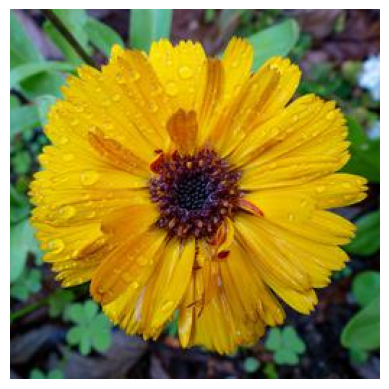

True class: calendula
Predicted class: calendula
Predicted probabilities: [1.2850899e-03 4.5723948e-04 1.6931597e-04 8.4932256e-01 5.9322668e-03
 1.5063699e-02 2.6250727e-02 4.7096089e-03 8.1627488e-02 4.1390220e-05
 2.5825284e-04 8.7270262e-03 1.2875551e-04 6.0264738e-03]

Top predictions:
1: calendula (84.93% | 0.84932255744934082)
2: dandelion (8.16% | 0.08162748813629150)
3: common_daisy (2.63% | 0.02625072747468948)


In [173]:
# Function to extract the class name from the image path
def extract_class_name(image_path):
    return os.path.basename(os.path.dirname(image_path))

# Load and preprocess the image
img_path = '/kaggle/input/flower-classification/val/calendula/45993517234_5e4dfdefae_c.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Interpret the results
predicted_class = np.argmax(predictions)
predicted_class_label = labels[predicted_class]

# Extract the true class name from the image path
true_class_label = extract_class_name(img_path)

# Display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Display the results
print(f"True class (Real Name of flower): {true_class_label}")
print(f"Predicted class (Classified name of flower): {predicted_class_label}")
print(f"Predicted probabilities: {predictions[0]}")

# Get the top predicted classes and their probabilities
top_classes = 3  # Set the number of top classes to display
top_indices = np.argsort(predictions[0])[::-1][:top_classes]

print("\nTop predictions:")
for i in range(top_classes):
    index = top_indices[i]
    label = labels[index]
    probability = predictions[0][index]

    # Format the print statement with the complete decimal and limited percentage
    print(f"{i + 1}: {label} ({probability * 100:.2f}% | {probability:.17f})")